# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.colors as colors
from IPython.display import display, HTML


## Load dataset for analysis
Here the different data sets are loaded and brought in a common standard format for the analysis pipeline.

In [64]:
data_ids = {'2017-05-12_MTP_R1', 'flutype_test' }

#--------------------------
data_id = '2017-05-12_MTP_R1'
#data_id = 'flutype_test'
#--------------------------
if data_id == '2017-05-12_MTP_R1': 
    # Microtiter Plate (2017-05-12, 1 plate, 1/3 repeats)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id), sep=',', index_col=0)
    output = output.T 
    
    
    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")

    
    
    # todo: this information has to be pulled out from data (in meta information for experiment)
    output.index = ["X31A","X31","X31","X31","Pan","Pan","Pan","Calif","Calif","Calif","no-virus","no-virus"]
    
elif data_id == "flutype_test":
    # Microarray (1 plate, 1 measurement)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id) , sep='\t')
    output.index = output.virus
    output = output.drop('virus', 1)

    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    #pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")

#display meta data 
display(meta.head())
#display reader output
display(output.head())
#display peptide positions
display(pep_cor.T)
display(vir_cor.T)

,field,info
0,type,Microtiter Plate
1,date,2017-05-12
2,repeat,1
3,total_repeats,3
4,virus,"[""X31A"",""X31"",""X31"",""X31"",""Pan"",""Pan"",""Pan"",""C..."


,A,B,C,D,E,F,G,H
X31A,22508,21229,21266,21238,20484,14842,33306,17090
X31,20337,22922,23449,23548,24198,17464,37703,20670
X31,20394,21386,23071,26460,27889,17428,40646,22175
X31,18970,19488,20933,23260,25058,17656,39031,22479
Pan,17500,16958,18548,18157,18304,15398,27502,17905


Row,1,2,3,4,5,6,7,8
Column,,,,,,,,
1,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
2,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
3,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
4,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
5,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
6,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
7,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
8,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
9,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer


Row,1,2,3,4,5,6,7,8
Column,,,,,,,,
1,X31C,X31C,X31C,X31C,X31C,X31C,X31C,X31C
2,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
3,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
4,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
5,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1
6,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1
7,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1
8,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1
9,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1,CAL1


## Heatmap of array/plate with peptide and virus information 

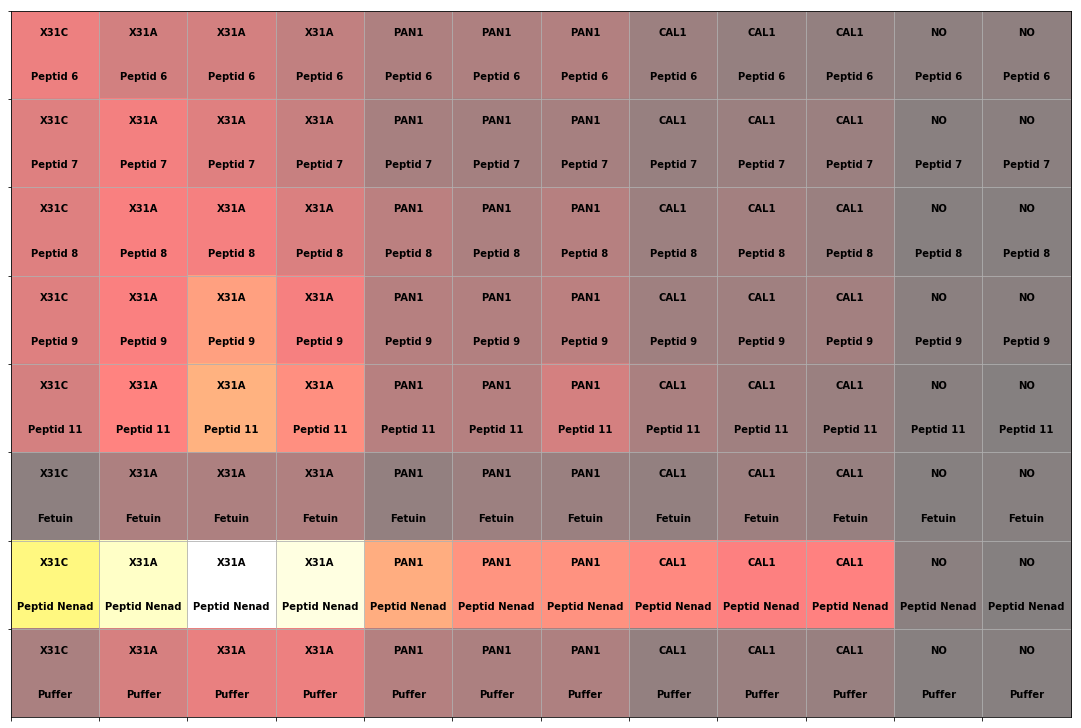

In [65]:
fig, ax = plt.subplots(figsize=(20,13))

#imshow portion
ax.imshow(output.T.values, interpolation='nearest',cmap="hot",alpha=0.5)
#text portion
y, x = np.meshgrid(vir_cor.index.values-1,vir_cor.columns.values-1)
for x_val, y_val in zip(x.flatten(), y.flatten()):
    #print(y_val)
    ax.text(x_val, y_val+0.25, pep_cor.values[y_val,x_val], va='center', ha='center',fontsize=10,weight="bold")
    ax.text(x_val, y_val-0.25, vir_cor.values[y_val,x_val], va='center', ha='center',fontsize=10,weight="bold")

#set tick marks for grid
ax.set_xticks(pep_cor.columns.values-1.5)
ax.set_yticks(pep_cor.index.values-1.5)

#ax.set_yticks(np.arange(min_val-diff/2, max_val-diff/2))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(x.min()-0.5, x.max()+0.5)
ax.set_ylim(y.max()+0.5, y.min()-0.5)
ax.grid()
fig.savefig("./results/{}_heatmap2.png".format(data_id),bbox_inches='tight')

plt.show()



## Comapct version of heatmap

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


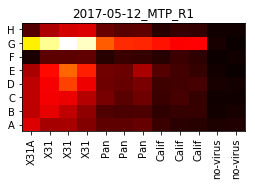

In [66]:
#heatmap of microwellplate
# legend (color bar)

data = output.convert_objects(convert_numeric=True)
fig = plt.figure(figsize=(4.0,2))
plt.pcolor(data.T,cmap='hot')
plt.xticks(np.arange(0.5, len(data.index), 1), output.index,rotation=90)
plt.yticks(np.arange(0.5, len(data.columns), 1), data.columns)
plt.title(data_id,fontsize="large")
fig.savefig("./results/{}_heatmap.png".format(data_id),bbox_inches='tight')

plt.show()


## Errorbar plots 

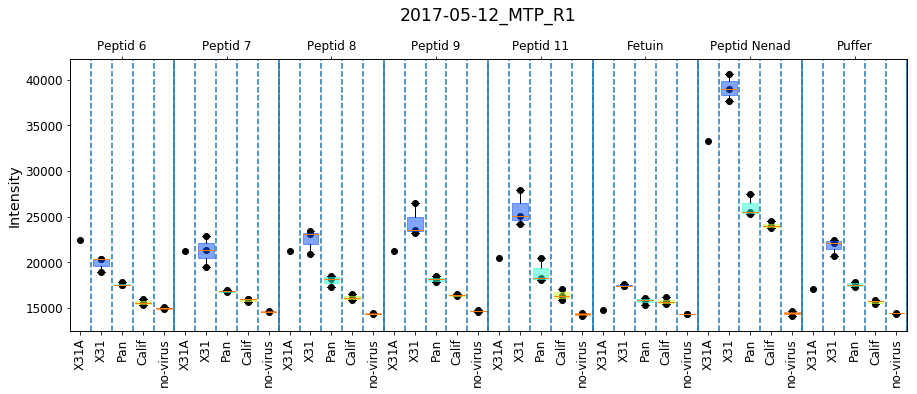

In [67]:
# overview plot of peptide-virus signal
fig = plt.figure(figsize=(15,5.0))
ax2 = plt.subplot(111)
ax = ax2.twiny()

# for x-axis ticks and labels
peptide_ticks_x_axis = []
virus_ticks_x_axis = []
virus_label_x_axis = []

cmap  = plt.get_cmap('jet')
Nvirus = len(output.index.unique())
spacing = 1.0/Nvirus

for index_peptide, peptide in enumerate(output.columns):
    for index_virus, virus in enumerate(output.index.unique()):
        
        #draw vertical dashed line to seperate viruses
        plt.axvline(x=[index_peptide + index_virus * spacing + spacing * 0.5 ], linestyle='dashed')
        
        # add x-tick position and label for virus
        virus_ticks_x_axis.append(index_peptide + index_virus * spacing)
        virus_label_x_axis.append(virus)
        
        # select data with current peptide and virus 
        data = output[peptide].where(output.index==virus)
        data = data.dropna(axis=0, how='all')
        
        # scatter plot (individual data points)
        ax.scatter(index_peptide  * np.ones(data.shape) + index_virus * spacing, data, color='k', marker='o')

        
        # plot  boxplot if more than one datapoint
        # what are whiskers?
        if len(data) > 1: 
            data = pd.to_numeric(data)
            bp = ax.boxplot(data.values, positions=[index_peptide+index_virus*spacing], 
                            patch_artist=True, showfliers=False)
            plt.setp(bp['boxes'], color=cmap(index_virus / Nvirus), alpha=0.5)
            

    # add x-tick position and label for peptide    
    peptide_ticks_x_axis.append(index_peptide + 0.4)
    
    #draw vertical line to seperate peptides
    plt.axvline(x=index_peptide + 1 - spacing * 0.5 )

# setup upper x-axis            
#plt.xticks(peptide_ticks_x_axis,["peptide " + str(s) for s in output.columns],fontsize="large")
#attantion not allways right !!!!!!!! otherwise take upper todo make general
plt.xticks(peptide_ticks_x_axis,pep_cor[1],fontsize="large")
ax.set_xlim(-0.1 , index_peptide + 1 - spacing * 0.5 )

# setup lower x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(virus_ticks_x_axis)
#["peptide " + str(s) for s in output.columns]
ax2.set_xticklabels(virus_label_x_axis,rotation=90,fontsize="large")
ax2.tick_params(labelsize="large") 

ax2.set_ylabel("Intensity",fontsize="x-large")
# nicer plot
ax.set_title(data_id,y=1.12,fontsize="xx-large")
fig.savefig("./results/{}_barplot.png".format(data_id),bbox_inches='tight')

plt.show()

## PCA and reduction to 2 dimentions & plot

In [68]:
def map_strings_to_number(strings):
    """Transforms list of strings into numbers."""
    counter = 0
    d = {}
    numbers = []
    for s in strings:
        if s in d:
            pass
        else:
            d[s] = counter
            counter+=1
        numbers.append(d[s])
        
    return numbers
    
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a String or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for String, None, or a colormap instance:
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


In [33]:
#build model
pca = decomposition.PCA()
pca.fit(output)

#perform pca
pca_score = pca.explained_variance_ratio_ 
pca_components = pca.components_
x_train_pca = pca.transform(output)

output_pca = pd.DataFrame(x_train_pca, index=output.index, columns=output.columns)

# store color information
output_pca.insert(0, "color", map_strings_to_number(output.index))
output_pca.insert(1, "virus", output.index)

print("PCA score for principal components (explained variance):\n", pca_score.round(3))
corr_values = dict(zip(output.columns, pca_components[0]))
feature_max_cor = max(corr_values, key=corr_values.get)
print("Feature with max. Variation:",feature_max_cor )
print("PCA Components in feature space:", pca_components[0])


cor_to_strongest_feature = output[output.columns[:]].corr()[feature_max_cor][:]
print("\nThe Correlation of the Features to the Feature with highest Varaiance")
print(cor_to_strongest_feature)


PCA score for principal components (explained variance):
 [ 0.951  0.025  0.016  0.004  0.002  0.001  0.001  0.   ]
Feature with max. Variation: G
PCA Components in feature space: [ 0.18252918  0.22640689  0.26495517  0.32186458  0.36495278  0.08073223
  0.74204509  0.22646376]

The Correlation of the Features to the Feature with highest Varaiance
A    0.837000
B    0.910098
C    0.954515
D    0.961688
E    0.945932
F    0.831291
G    1.000000
H    0.928898
Name: G, dtype: float64


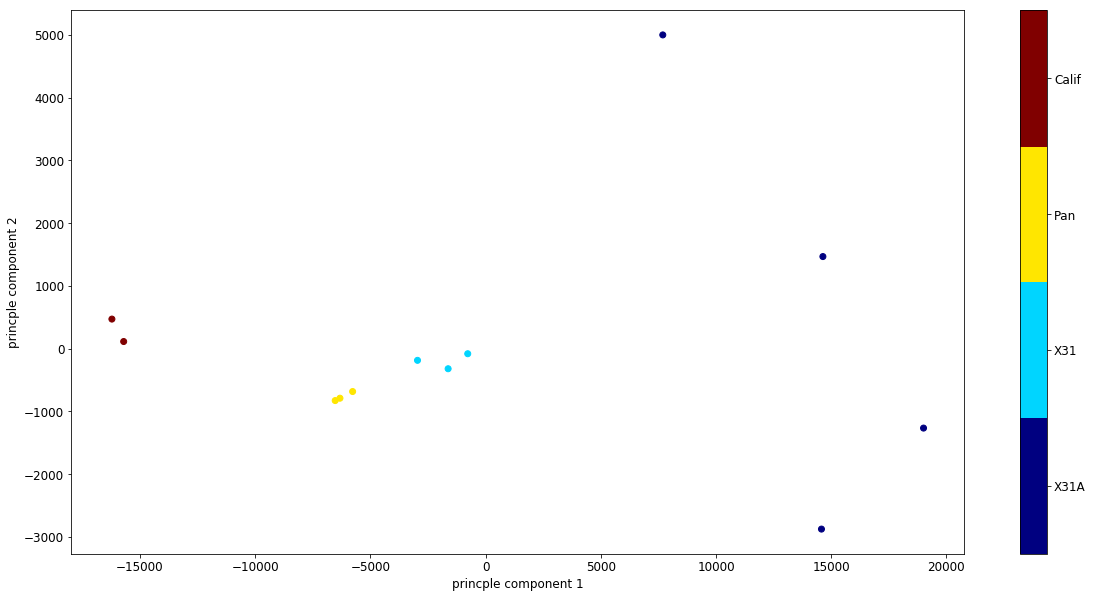

In [34]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel("princple component 1",  size='large')
plt.ylabel("princple component 2",  size='large')
plt.tick_params(labelsize="large") 
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], 
            c=output_pca["color"].values, cmap=discrete_cmap(output_pca["color"].values.max(), 'jet'))



color_mapping = output_pca[['color','virus']].sort_values(by=["color"])


cbar = plt.colorbar(ticks=sorted(output_pca["color"].unique()))
cbar.set_ticklabels(color_mapping['virus'].unique())
cbar.ax.tick_params(labelsize="large") 
plt.clim(0.5, output_pca["color"].values.max() + 0.5)

plt.show()

## Correlation analysis

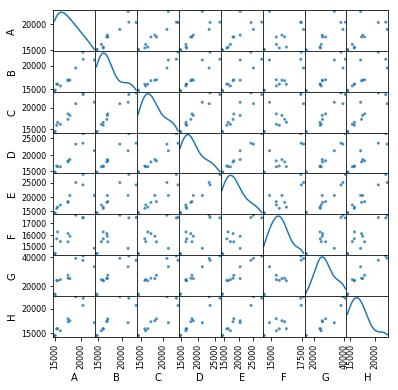

In [35]:
# TODO virus in color
pd.plotting.scatter_matrix(output, alpha=0.8, figsize=(6, 6), diagonal='kde')
plt.show()

In [37]:
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90,fontsize="xx-large")
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index,fontsize="xx-large")

    return ec

In [53]:
#make mean data for viruses
data=[]
for virus in output.index.unique():
    if len(output.loc[virus].shape) == 1:
        data.append(output.loc[virus].values)
    else:
        data.append(output.loc[virus].mean().values)
unique_virus_output=pd.DataFrame(data,output.index.unique(),columns=output.columns)
#attantion not allways right !!!!!!!! otherwise take upper todo make general
unique_virus_output=pd.DataFrame(data,output.index.unique(),columns=pep_cor[1])


In [54]:
print(unique_virus_output)

1             Peptid 6      Peptid 7      Peptid 8      Peptid 9  \
X31A      22508.000000  21229.000000  21266.000000  21238.000000   
X31       19900.333333  21265.333333  22484.333333  24422.666667   
Pan       17618.666667  16857.000000  18004.666667  18174.333333   
Calif     15629.333333  15876.000000  16196.666667  16440.000000   
no-virus  14992.000000  14630.500000  14415.500000  14685.500000   

1            Peptid 11        Fetuin  Peptid Nenad        Puffer  
X31A      20484.000000  14842.000000  33306.000000  17090.000000  
X31       25715.000000  17516.000000  39126.666667  21774.666667  
Pan       18944.000000  15786.333333  26076.666667  17560.666667  
Calif     16466.666667  15766.333333  24097.000000  15689.000000  
no-virus  14349.000000  14387.000000  14454.500000  14440.000000  


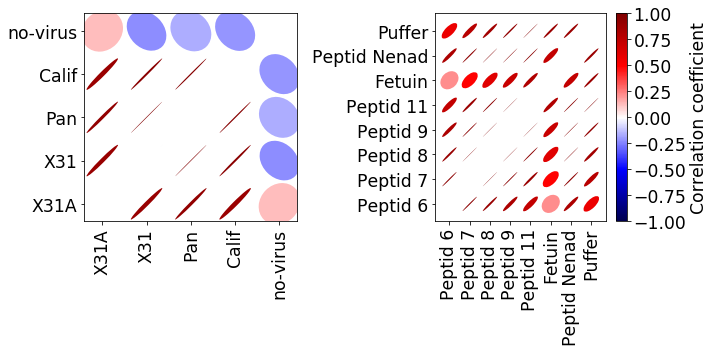

In [57]:
data = unique_virus_output.T.corr()
f, (ax, ax2) = plt.subplots(1, 2,figsize=(10,5.0))
m = plot_corr_ellipses(data, ax=ax, cmap='seismic',clim=[-1, 1])

ax.margins(0.1)

m = plot_corr_ellipses(unique_virus_output.corr(), ax=ax2, cmap='seismic',clim=[-1, 1])
cb = f.colorbar(m)
cb.ax.tick_params(labelsize="xx-large") 

cb.set_label('Correlation coefficient',fontsize="xx-large")
ax2.margins(0.1)
f.tight_layout()

f.savefig("./results/{}_corr_matrix_plot.png".format(data_id),bbox_inches='tight')

plt.show()